![ ](https://scontent-arn2-2.xx.fbcdn.net/v/t1.0-9/57429716_2030860760555937_2750062083545497600_n.jpg?_nc_cat=100&ccb=2&_nc_sid=8bfeb9&_nc_ohc=y5d_WudgJy0AX9PNi5o&_nc_ht=scontent-arn2-2.xx&oh=a630ca82a715594c37e77c981b2f0b12&oe=6004F26F)
                                   


 1. EXPLORATORY DATA ANALYSIS
   
   - 1.1 Libraries
   
   - 1.2 Acquire the data
  
   - 1.3 Descriptive statistics
  
   - 1.4 Data visualisation
   

2. Feature Engineering

   - 2.1 Filling missing Values
  
   - 2.2 Binning the categorical features
  
   - 2.3 Creating New Features
   
   - 2.4 Removing irrelevant variables
   
   - 2.4 Creating dummy variables
   
  

3. Pre-Modeling Tasks


   -  3.1 Defining Features in Training/Test Set
   
   -  3.2 Splitting the dataset
   

4. Modeling
 
  
   - Random Forest Model
   
   
5. Evaluating the performance of the model
     
     - Confusion Matrix
     - Classificarion Report
     - Accuracy Score
     - Precision Score
     - ROC Curve
     
6. Submission


- Useful resources
  

# 1. EXPLORATORY DATA ANALYSIS


 ## Libraries 📚

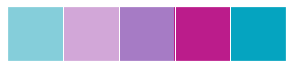

In [1]:

import numpy as np 
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
sns.set()

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder   
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, balanced_accuracy_score



# Color Palette

custom_colors = ["#85CEDA","#D2A7D8", "#A67BC5", "#BB1C8B", "#05A4C0"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

# Set size

sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

### 1.2 Acquire data

In [2]:
train = pd.read_csv("../input/titanic/train.csv")
test  = pd.read_csv("../input/titanic/test.csv")

* **Variables** 

-`PassengerId` is the unique id of the row and it doesn't have any effect on target

- `Name` 

- `Sex` 

- `Age`

-`Survived` is the target variable we are trying to predict (0 or 1):
     
      1 = Survived
      0 = Not Survived
-`Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
      
      1 = Upper Class
      2 = Middle Class
      3 = Lower Class

-`SibSp` is the total number of the passengers' siblings and spouse.

-`Parch` is the total number of the passengers' parents and children.

-`Ticket` is the ticket number of the passenger.

-`Fare` is the passenger fare.

-`Cabin` is the cabin number of the passenger.

-`Embarked` is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
      
     C = Cherbourg
     Q = Queenstown
     S = Southampton

### 1.3 Descriptive Statistics

* So first we need to know **which variables are available in the dataset** ?

In [3]:
print (train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


* **Categorical Features** : Survived,Embarked and Sex 
 Ordinal: Pclass.

* **Numerical Features** : Continous: Age, Fare. Discrete: SibSp, Parch.

* **What are the data types for various features?**

In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

* The next step we'll do some descriptive statistics, this one helps us to describe and understand the features of a specific data by giving short summaries about the sample and measures of the data.


* **Statistical info about the numerical variables** :

In [5]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

Sex  PassengerId  Survived    Pclass        Age     SibSp     Parch  \
0  female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
1    male   454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

        Fare  
0  44.479818  
1  25.523893

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* only 38% passenger survived 
* 74% female passenger survived, and only 19% male passenger survived.
* About 75% of passengers did not travel with their children or parents.
* Around 30% of the passengers had siblings aboard


* **Checking for the correlation**

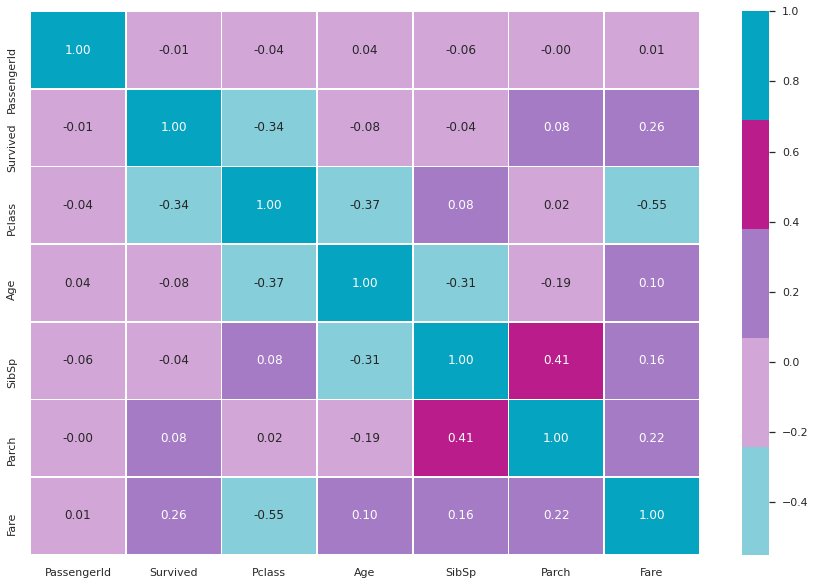

In [7]:
# Correlation Map

train.corr
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(train.corr(), annot =True, linewidth =".5", fmt =".2f", cmap=custom_colors)
plt.show()

* **pandas_profiling**

In [8]:
profile = pandas_profiling.ProfileReport(train)

In [9]:
profile

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### 1.4 Data Visualization 📊📈

* **Survived feature**

Distribution of survivals : 1 is for survival and 0 is for not

In [10]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
fig = px.bar(train.Survived.value_counts(), width=900, height=400)
fig.update_traces(marker_color='orchid')
fig.show()

* **Survived by Age**

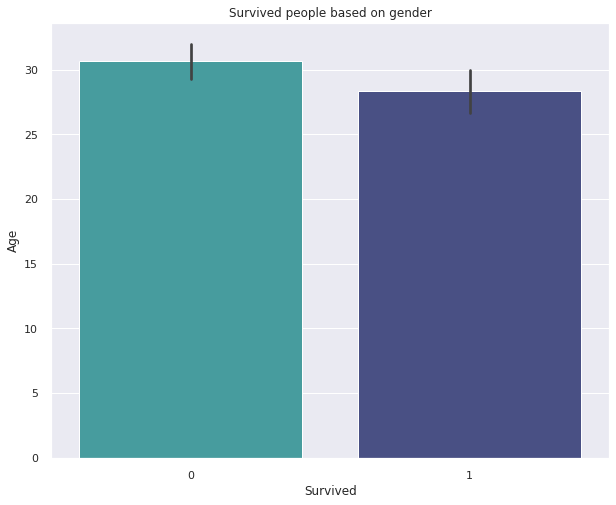

In [12]:
# BarPlot


plt.figure(figsize=(10,8))
plt.title("Survived people based on gender")
sns.barplot(x="Survived",y="Age", data =train,palette='mako_r')

* **Age**

In [13]:
def hist(x,title):
    plt.figure(figsize = (10,8))
    ax = sns.distplot(x, 
                 kde=False);
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches, colors):
        rec.set_color(col)
    plt.title(title)

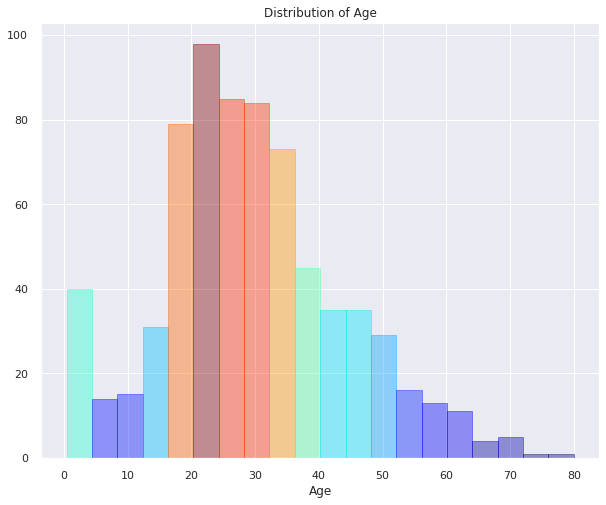

In [14]:
hist(train['Age'],'Distribution of Age')


* **Fare**

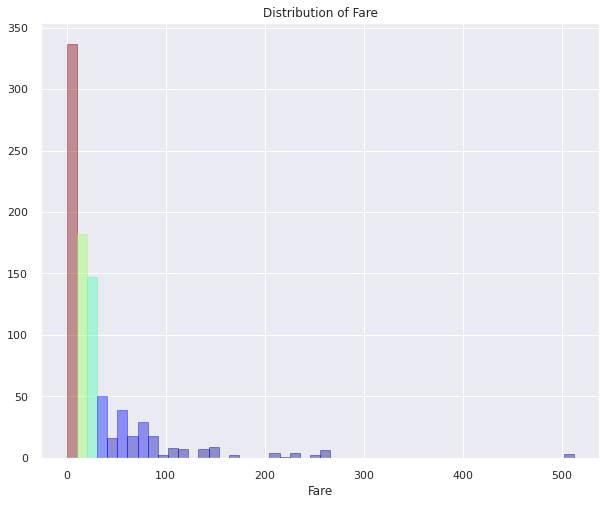

In [15]:
hist(train['Fare'],'Distribution of Fare') 


* **Sex feature vs Survived feature**

Percentage of females who survived : 74.20382165605095
Percentage of males who survived : 18.890814558058924


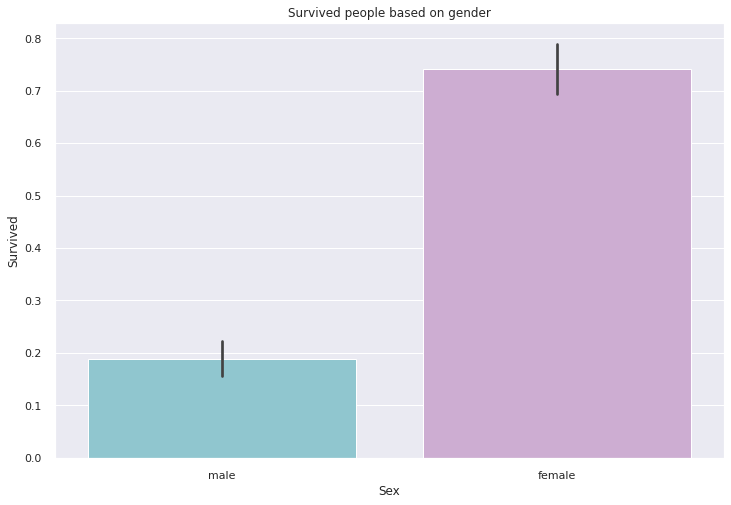

In [16]:
# BarPlot

# Set the width and the height of the figure
plt.figure(figsize=(12,8))

# Add the title
plt.title("Survived people based on gender")

# Draw a barplot of survival people by sex
sns.barplot(x="Sex",y="Survived", data =train,palette=(custom_colors))

# Print percentage of males vs females that are survived 
print("Percentage of females who survived :",  train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print ("Percentage of males who survived :",  train["Survived"][train["Sex"]==  'male'].value_counts(normalize= True)[1]*100)

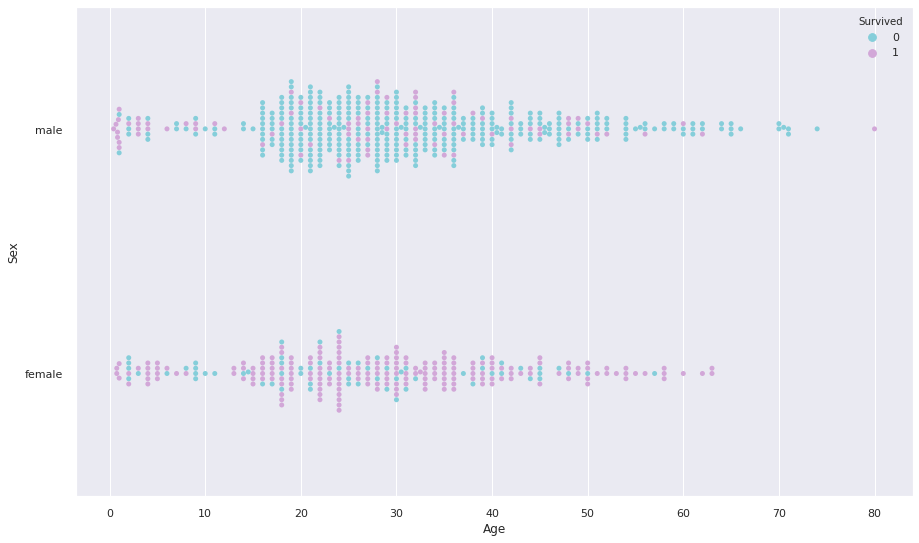

In [17]:
# swarmplot

plt.figure(figsize=(15,9))

sns.swarmplot(x=train['Age'], y=train['Sex'], hue='Survived', data =train,palette =custom_colors)

- According to this graph, we can notice that womens are more likely to survive.

* **PARCH feature vs Survived feature**

<function matplotlib.pyplot.show(*args, **kw)>

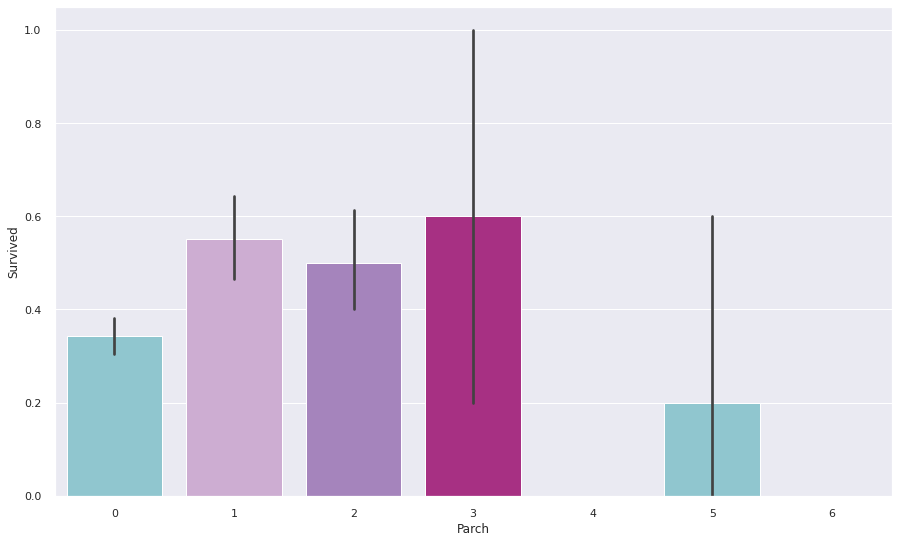

In [18]:
# Barplot
plt.figure(figsize=(15,9))
sns.barplot(x="Parch", y="Survived", data = train, palette=custom_colors)
plt.show

- People with less than four parents or childrens aboard more likely to survive.

* **SibSp Feature** 

<function matplotlib.pyplot.show(*args, **kw)>

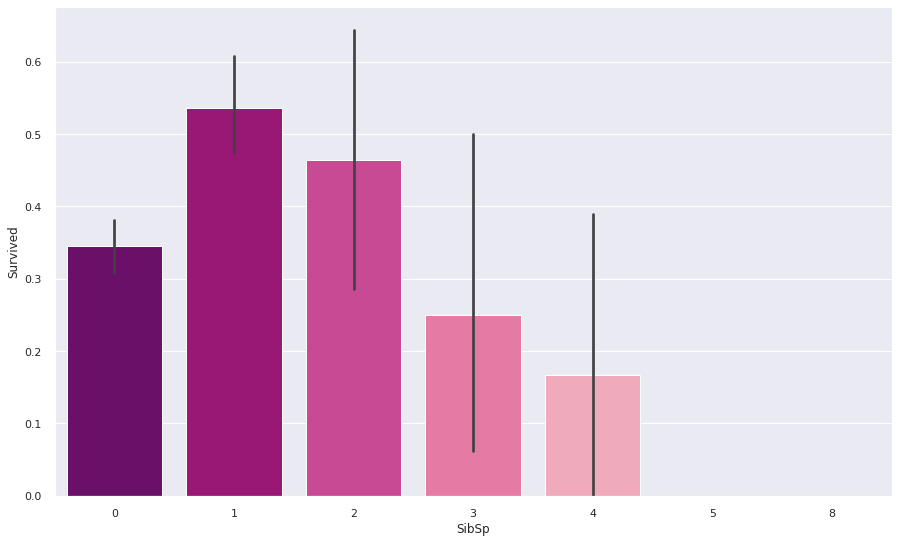

In [19]:
# Barplot

plt.figure(figsize=(15,9))
sns.barplot(x="SibSp", y="Survived", data=train, palette= 'RdPu_r')
plt.show

- People with SibSp or spouses were less likely to survive, therefore people with no children were more less likely to survived than those with one children or two.

* **Embarked and fare features**

Let's now see how the embarkation site affects the survival.

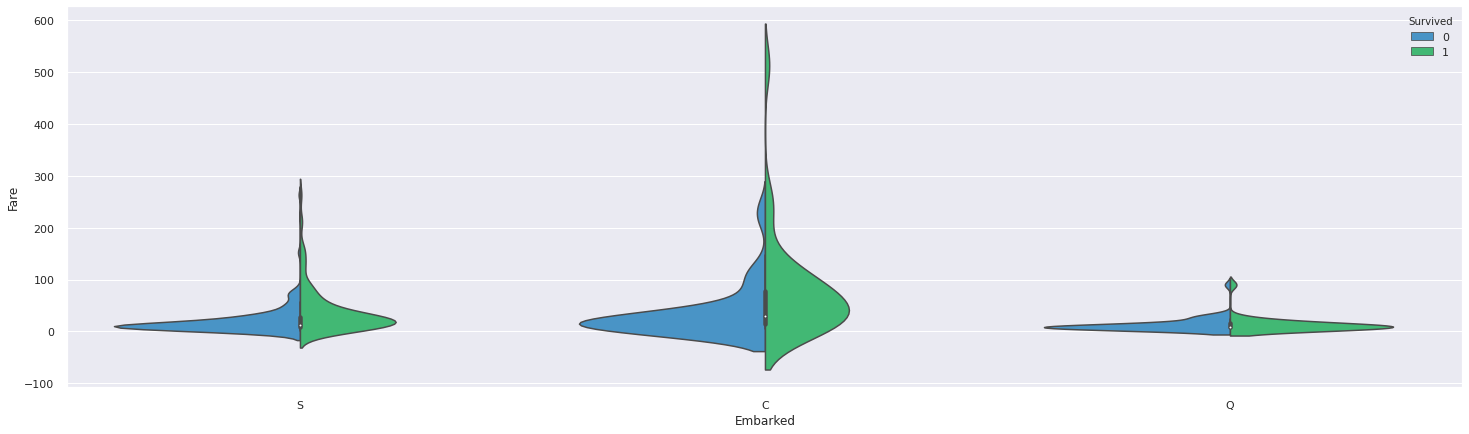

In [20]:
# Violinplot

fig = plt.figure(figsize=(25, 7))
sns.violinplot(x ="Embarked", y ="Fare", hue ="Survived", data=train, split =True , palette = {0: "#3498db", 1:"#2ecc71"});

* **Passenger Class**

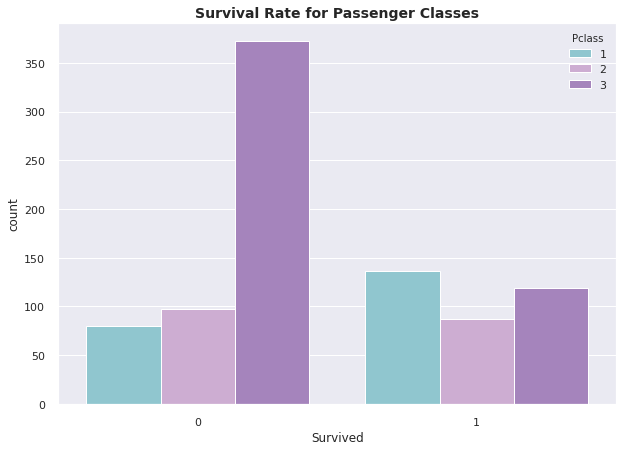

In [21]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = custom_colors)
ax.set_xlabel('Survived')
ax.set_title('Survival Rate for Passenger Classes', fontsize = 14, fontweight='bold');